# Analisis estadístico de partidas Blitz - `bbadd13`

### Diccionario de Datos y descripción

`df_white` - `df_black` (DataFrames correspondientes con variables anadidas)

| Variable      | Tipo    | Descripción                                                        |
| ------------- | ------- | ------------------------------------------------------------------ |
| `game_id` | object     | ID del juego |
| `date`       | object  | Fecha del juego (AAAA.MM.DD)                      |
| `white` | object  | Nombre de usuario de quien lleva las piezas blancas                        |
| `black`   | object  | Nombre de usuario de quien lleva las piezas negras                       |
| `white_elo`  | int | ELO de las piezas blancas                        |
| `black_elo`  | int | ELO de las piezas negras                        |
| `result`     | object | Resultado de la partida (1/2-1/2, 0-1 o 1-0) |
| `opening` | object | Apertura jugada en esa partida    |
| `eco` | object | Codigo ECO de la apertura |
| `move_number` | int | Numero del movimiento | 
| `player_to_move` | object | Pieza que debe hacer el movimiento |
| `move_san` | object | Notacion estandar |
| `fen_before` | object | Representacion del tablero antes del movimiento en notacion FEN |
| `time_remaining` | object | Tiempo sobrante desde el movimiento |
| `best_move` | object | Mejor movimiento por Stockfish 17.1 en notacion UCI |
| `eval_before` | float | Evaluacion de la posicion antes del movimiento en Centipeones |
| `eval_after` | float | Evaluacion de la posicion despues del movimiento en Centipeones |
| `centipawn_loss` | float | Perdida de Centipeones por movimiento |
| `avg_cpl_player_game` | float | Promedio de CPL por jugador en el juego |
| `avg_cpl_game` | float | Promedio de CPL por juego |
| `accuracy_game_player` | float |  Accuracy del Target Player en juego |

Estos DataFrames contienen la información de la partida cuando el `Target Player` juega con las piezas blancas y negras respectivamente.

Está conformado por todos los movimientos de todas las partidas parseadas y analizadas con los scripts anteriores, esto quiere decir, que todos los registros tienen data de ambos `Jugadores` por movimiento.

DFs como `df_white_moves` - `df_black_moves` contienen las mismas variables pero los registros solamente corresponden a los movimientos del `Target Player`

El DF `df_games_white` se agrupa solamente por el ID de la partida, util para el analisis descriptivo de las partidas

### Carga de datos

* Creación y exploración de los DataFrames principales

In [30]:
import pandas as pd

#Cargar del CSV con partidas blancas con todos los movimientos
df_white = pd.read_csv(r"D:\Chess\Analisis\data\processed\games_with_analysis_white.csv")

#df_white.head()
#df_white.info()
#df_white.describe()
#df_white.isnull().sum()

In [31]:
#Carga del CSV con partidas negras con todos los movimientos
df_black = pd.read_csv(r"D:\Chess\Analisis\data\processed\games_with_analysis_black.csv")

#df_black.head()
#df_black.describe()
#df_black.info()
#df_black.isnull().sum()

In [32]:
#Creacion del DF con partidas blancas y negras por juego
df_games_white = df_white.groupby("game_id").last().reset_index()
df_games_black = df_black.groupby("game_id").last().reset_index()

## Resultados por partida

* Resultados con piezas blancas:
    * Partida perdida
    * Partida ganada
    * Tablas

* Resultados con piezas negras:
    * Partida ganada
    * Partida perdida
    * Tablas

* ELO promedio
    * Descripción estadística del ELO
    * Distribución con piezas negras y blancas

* ELO promedio contricante
    * Descripcion estadistica del ELO
    * Distribucion con piezas negras y blancas

In [33]:
dic_white = {
    '1-0': "ganadas",
    '0-1': "perdidas",
    '1/2-1/2': "tablas"
}

dic_black = {
    '1-0': "perdidas",
    '0-1': "ganadas",
    '1/2-1/2': "tablas"
}

res_white = df_games_white.groupby("result").size().rename_axis("Resultado").reset_index(name="Cantidad")
res_white["Interpretacion"] = res_white["Resultado"].map(dic_white)

print("Resultado de partida con piezas blancas:\n", res_white)

# Contar resultados con negras
res_black = df_games_black.groupby("result").size().rename_axis("Resultado").reset_index(name="Cantidad")
res_black["Interpretacion"] = res_black["Resultado"].map(dic_black)


print("\n Resultado de partida con piezas negras:\n", res_black)

Resultado de partida con piezas blancas:
   Resultado  Cantidad Interpretacion
0       0-1        73       perdidas
1       1-0        78        ganadas
2   1/2-1/2         7         tablas

 Resultado de partida con piezas negras:
   Resultado  Cantidad Interpretacion
0       0-1        90        ganadas
1       1-0        71       perdidas
2   1/2-1/2         5         tablas


### ELO promedio


ELO Descripcion estadistica:
count     324.000000
mean     1291.416667
std        90.845508
min      1121.000000
25%      1201.500000
50%      1307.000000
75%      1354.500000
max      1500.000000
dtype: float64


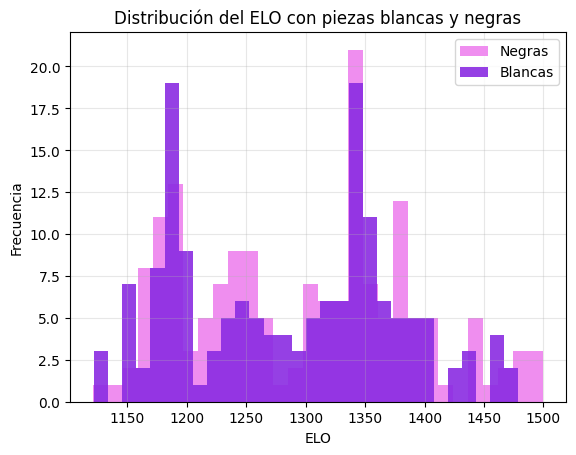

In [34]:
#Concatenacion de los ELOS
ELOS = pd.concat([df_games_white["white_elo"], df_games_black["black_elo"]])

ELO_prommedio = ELOS.mean()
ELO_describe = ELOS.describe()

print(f"\nELO Descripcion estadistica:\n{ELO_describe}")

import matplotlib.pyplot as plt

plt.Figure(figsize=(16, 8))
plt.hist(df_games_black['black_elo'], bins=30, alpha=0.9, label="Negras", color='violet')
plt.hist(df_games_white['white_elo'], bins=30, alpha=0.9, label="Blancas", color='blueviolet')
#plt.hist(ELOS, bins=30, color='blue', alpha=0.7)
plt.title("Distribución del ELO con piezas blancas y negras")
plt.xlabel("ELO")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### ELO promedio contricante


ELO Descripcion estadistica:
count     324.000000
mean     1298.604938
std       140.198946
min       981.000000
25%      1206.500000
50%      1293.000000
75%      1361.000000
max      2404.000000
dtype: float64


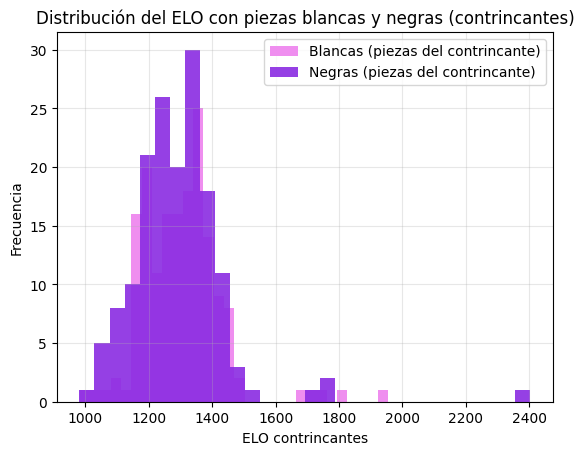

In [35]:
#Concatenacion de los ELOS
ELOS_CONTRINCANTES = pd.concat([df_games_white["black_elo"], df_games_black["white_elo"]])

ELO_prommedio_contrincantes = ELOS_CONTRINCANTES.mean()
ELO_describe_contrincantes = ELOS_CONTRINCANTES.describe()

print(f"\nELO Descripcion estadistica:\n{ELO_describe_contrincantes}")

import matplotlib.pyplot as plt

plt.Figure(figsize=(16, 8))
plt.hist(df_games_black['white_elo'], bins=30, alpha=0.9, label="Blancas (piezas del contrincante)", color='violet')
plt.hist(df_games_white['black_elo'], bins=30, alpha=0.9, label="Negras (piezas del contrincante)", color='blueviolet')
#plt.hist(ELOS, bins=30, color='blue', alpha=0.7)
plt.title("Distribución del ELO con piezas blancas y negras (contrincantes)")
plt.xlabel("ELO contrincantes")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Aperturas

* Aperturas mas jugadas en general
    * Con piezas blancas y negras
* Rendimiento por apertura en general
    * Rendimiento con piezas blancas y negras

In [36]:
aperturas_general = pd.concat([df_games_white["opening"], df_games_black["opening"]])

print(f"Aperturas mas jugadas en general:\n", aperturas_general.value_counts().head(10))

Aperturas mas jugadas en general:
 opening
Four Knights Game: Italian Variation            21
Italian Game: Anti-Fried Liver Defense          21
Vienna Game                                     12
King's Pawn Game: Leonardis Variation           11
Owen Defense                                    11
Scotch Game                                     10
Queen's Pawn Game                                9
Queen's Pawn Game: Accelerated London System     8
Three Knights Opening                            8
Modern Defense                                   7
Name: count, dtype: int64


In [37]:
print(f"Aperturas mas jugadas con piezas blancas:\n", df_games_white["opening"].value_counts(). head(10))

Aperturas mas jugadas con piezas blancas:
 opening
Four Knights Game: Italian Variation         18
Vienna Game                                  12
Modern Defense                                7
Petrov's Defense: Three Knights Game          7
Caro-Kann Defense                             6
Three Knights Opening                         6
Philidor Defense                              6
Queen's Pawn Game: Zukertort Variation        5
Petrov's Defense: Italian Variation           5
Scandinavian Defense: Valencian Variation     5
Name: count, dtype: int64


In [38]:
print(f"Aperturas mas jugadas con piezas negras:\n", df_games_black["opening"].value_counts().head(10))

Aperturas mas jugadas con piezas negras:
 opening
Italian Game: Anti-Fried Liver Defense          20
King's Pawn Game: Leonardis Variation           11
Scotch Game                                     10
Queen's Pawn Game: Accelerated London System     8
Owen Defense                                     8
Queen's Pawn Game                                8
Bishop's Opening                                 7
Hungarian Opening                                6
Van't Kruijs Opening                             6
Ruy Lopez: Steinitz Defense                      5
Name: count, dtype: int64


### Rendimiento por apertura

In [39]:
df_games_white['color'] = "white"
df_games_black['color'] = 'black'

df_games_white["score"] = df_games_white["result"].map({"1-0": 1, "0-1": 0, "1/2-1/2": 0.5})
df_games_black["score"] = df_games_black["result"].map({"1-0": 0, "0-1": 1, "1/2-1/2": 0.5})

df_white_black_games = pd.concat([df_games_white, df_games_black], ignore_index=True)

rendimiento_general = df_white_black_games.groupby("opening")["score"].mean().sort_values(ascending=False)
print(f"Rendimiento promedio por apertura general: \n", rendimiento_general.head(10))

rendimiento_por_color = df_white_black_games.groupby(["opening", "color"])["score"].mean().unstack()
print(f"Rendimiento promedio por apertura y color: \n", rendimiento_por_color.head(10))

Rendimiento promedio por apertura general: 
 opening
Alekhine Defense                                                     1.0
French Defense: Knight Variation                                     1.0
Queen's Gambit Declined: Harrwitz Attack                             1.0
Nimzowitsch Defense: Breyer Variation                                1.0
Queen's Gambit Declined: Exchange Variation, Positional Variation    1.0
Pirc Defense: Classical Variation                                    1.0
Italian Game: Giuoco Piano                                           1.0
Italian Game: Hungarian Defense                                      1.0
King's Gambit Declined: Queen's Knight Defense                       1.0
King's Knight Opening: Normal Variation                              1.0
Name: score, dtype: float64
Rendimiento promedio por apertura y color: 
 color                                                  black  white
opening                                                            
Alekhine

### Métricas de calidad de juego 

* Pérdida de centipeones promedio
    * General 
    * Piezas blancas (por jugador en partida y por partida)
    * Piezas negras (por jugador en partida y por partida)
* Errores y blunders
    * Movimientos con pérdida de  >100 o >300 centipeones
    * General
    * Piezas blancas
    * Piezas negras
* Accuracy


⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️⚠️

El CPL no es un valor único por partida, es un valor por movimiento
1. El DataFrame contiene valores de los CPL por movimiento de forma intercalada, para promediar el CPL por partida por cada jugador es necesario sumar solamente los CPL por cada movimiento de cada jugador
2. Para calcular el CPL promedio de partida (ambos jugadores) se tienen que iterar por los movimientos de ambos jugadores

In [40]:
#Filtrado por jugadas de blancas y negras
df_white_moves = df_white[df_white["player_to_move"] == "white"]
df_black_moves = df_black[df_black["player_to_move"] == "black"]

In [41]:
#CPL promedio por partida, solo movimientos de blancas
df_cpl_player_game_white = df_white_moves.groupby("game_id").agg(avg_cpl_player_game = ("centipawn_loss", "mean")).reset_index()
df_cpl_player_game_black = df_black_moves.groupby("game_id").agg(avg_cpl_player_game = ("centipawn_loss", "mean")).reset_index()

In [42]:
#Prueba para corroborar el cpl promedio del jugador en una partida
game_id_buscado = "vjvRbZTO"

df_cpl_player_game_white[df_cpl_player_game_white["game_id"] == game_id_buscado]

,game_id,avg_cpl_player_game
147,vjvRbZTO,190.088889


In [43]:
#CPL promedio en cada partida (ambos jugadores)
df_cpl_game_white = df_white.groupby("game_id").agg(avg_cpl_game = ("centipawn_loss", "mean")).reset_index()
df_cpl_game_black = df_black.groupby("game_id").agg(avg_cpl_game = ("centipawn_loss", "mean")).reset_index()

In [44]:
#Prueba para corroborar el cpl promedio en una partida
game_id_buscado = "vjvRbZTO"

df_cpl_game_white[df_cpl_game_white["game_id"] == game_id_buscado]

,game_id,avg_cpl_game
147,vjvRbZTO,2.505618


In [45]:
df_white = df_white.merge(df_cpl_player_game_white, on="game_id", how="left")
df_white = df_white.merge(df_cpl_game_white, on="game_id", how="left")

df_black = df_black.merge(df_cpl_player_game_black, on="game_id", how="left")
df_black = df_black.merge(df_cpl_game_black, on="game_id", how="left")

CPL promedio por movimiento del jugador con piezas blancas: 447.3360349964842
CPL promedio por movimientos del jugador con piezas negras: 104.10289047954271
CPL promedio por movimientos del jugador en general: 271.4820165094092


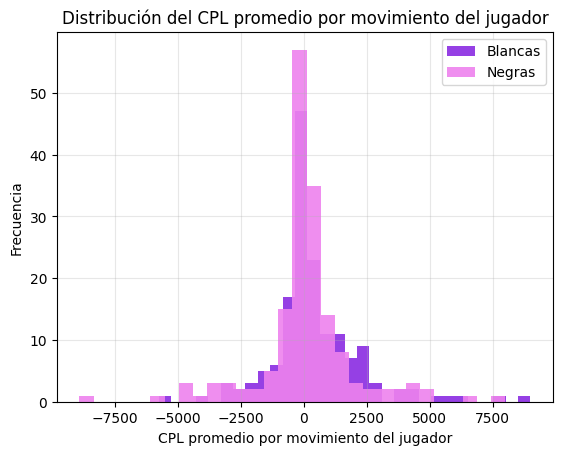

In [46]:
cpl_promedio_white_games = df_cpl_player_game_white["avg_cpl_player_game"].mean()
print(f"CPL promedio por movimiento del jugador con piezas blancas: {cpl_promedio_white_games}")

cpl_promedio_black_games = df_cpl_player_game_black["avg_cpl_player_game"].mean()
print(f"CPL promedio por movimientos del jugador con piezas negras: {cpl_promedio_black_games}")

cpl_promedio_general_games = pd.concat([df_cpl_player_game_white["avg_cpl_player_game"], df_cpl_player_game_black["avg_cpl_player_game"]]).mean()
print(f"CPL promedio por movimientos del jugador en general: {cpl_promedio_general_games}")

plt.hist(df_cpl_player_game_white["avg_cpl_player_game"], bins=30, alpha=0.9, label="Blancas", color='blueviolet')
plt.hist(df_cpl_player_game_black["avg_cpl_player_game"], bins=30, alpha=0.9, label="Negras", color='violet')
plt.title("Distribución del CPL promedio por movimiento del jugador")
plt.xlabel("CPL promedio por movimiento del jugador")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

#Esta grafica no nos sirve mucho ya que el cpl promedio por movimiento no nos indica exactamente el rendimiento del jugador en partida ni cuales movimientos fueron mejores o peores, es una grafica que solamente indica la frecuencia del cpl donde 0 pueden ser jugadas normales y no necesariamente indica partodas brillantes en su mayoria

In [47]:
#De momento no unificaremos ambos csv ya que asi como estan divididos en white y black nos es mas facil trabajar con ellos para identificar partidas propias y patrones por color
#Unifica ambos DFs (blancas y negras)
#df_all_games = pd.concat([df_white, df_black], ignore_index=True)

### Errores y Blunders

In [48]:
df_white_moves_adversary = df_white[df_white["player_to_move"] == "black"]
df_black_moves_adversary = df_black[df_black["player_to_move"] == "white"]

In [49]:
def clasificar_jugada(cp_loss):
    if cp_loss <= 20:
        return "Excelente"
    elif cp_loss <= 50:
        return "Buena"
    elif cp_loss <= 100:
        return "Inexactitud"
    elif cp_loss <= 300:
        return "Error"
    else:
        return "Blunder"

# Aplicar clasificación
df_white["clasificacion"] = df_white["centipawn_loss"].apply(clasificar_jugada)
df_black["clasificacion"] = df_black["centipawn_loss"].apply(clasificar_jugada)



# Resumen por color
resumen_white = df_white["clasificacion"].value_counts()
resumen_black = df_black["clasificacion"].value_counts()

print("Clasificación Blancas del Target Player:\n", resumen_white)
print("\nClasificación Negras del Target Player:\n", resumen_black)

print(f"Coincide el numero de jugadas por csv respecto a movimientos del target player: {resumen_white.sum() + resumen_black.sum()}")

Clasificación Blancas del Target Player:
 clasificacion
Excelente      5128
Blunder        2563
Error           920
Inexactitud     670
Buena           387
Name: count, dtype: int64

Clasificación Negras del Target Player:
 clasificacion
Excelente      5661
Blunder        2809
Error           990
Inexactitud     746
Buena           474
Name: count, dtype: int64
Coincide el numero de jugadas por csv respecto a movimientos del target player: 20348


In [50]:
def clasificar_jugada(cp_loss):
    if cp_loss <= 20:
        return "Excelente"
    elif cp_loss <= 50:
        return "Buena"
    elif cp_loss <= 100:
        return "Inexactitud"
    elif cp_loss <= 300:
        return "Error"
    else:
        return "Blunder"

# Aplicar clasificación
df_white_moves["clasificacion"] = df_white_moves["centipawn_loss"].apply(clasificar_jugada)
df_black_moves["clasificacion"] = df_black_moves["centipawn_loss"].apply(clasificar_jugada)

# Resumen por color
resumen_white_moves = df_white_moves["clasificacion"].value_counts()
resumen_black_moves = df_black_moves["clasificacion"].value_counts()

print("Clasificación Blancas del Target Player:\n", resumen_white_moves)
print("\nClasificación Negras del Target Player:\n", resumen_black_moves)

print(f"Coincide el numero de jugadas por csv respecto a movimientos del target player: {resumen_white_moves.sum() + resumen_black_moves.sum()}")

Clasificación Blancas del Target Player:
 clasificacion
Excelente      2013
Blunder        1474
Error           631
Inexactitud     514
Buena           250
Name: count, dtype: int64

Clasificación Negras del Target Player:
 clasificacion
Excelente      2973
Blunder        1530
Error           412
Inexactitud     215
Buena           174
Name: count, dtype: int64
Coincide el numero de jugadas por csv respecto a movimientos del target player: 10186


In [51]:
# Aplicar clasificación
df_white_moves_adversary["clasificacion"] = df_white_moves_adversary["centipawn_loss"].apply(clasificar_jugada)
df_black_moves_adversary["clasificacion"] = df_black_moves_adversary["centipawn_loss"].apply(clasificar_jugada)

# Resumen por color
resumen_white_adversary = df_white_moves_adversary["clasificacion"].value_counts()
resumen_black_adversary = df_black_moves_adversary["clasificacion"].value_counts()

print("Clasificación Blancas:\n", resumen_white_adversary)
print("\nClasificación Negras:\n", resumen_black_adversary)

print(f"Coincide el numero de jugadas por csv respecto a movimientos propios: {resumen_white_adversary.sum() + resumen_black_adversary.sum()}")

Clasificación Blancas:
 clasificacion
Excelente      3115
Blunder        1089
Error           289
Inexactitud     156
Buena           137
Name: count, dtype: int64

Clasificación Negras:
 clasificacion
Excelente      2688
Blunder        1279
Error           578
Inexactitud     531
Buena           300
Name: count, dtype: int64
Coincide el numero de jugadas por csv respecto a movimientos propios: 10162


C:\Users\mccaj\AppData\Local\Temp\ipykernel_29020\3934641135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white_moves_adversary["clasificacion"] = df_white_moves_adversary["centipawn_loss"].apply(clasificar_jugada)
C:\Users\mccaj\AppData\Local\Temp\ipykernel_29020\3934641135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_black_moves_adversary["clasificacion"] = df_black_moves_adversary["centipawn_loss"].apply(clasificar_jugada)


Fórmula aproximada usada por Lichess

La fórmula que tiene Lichess para calcular el accuracy contempla el cálculo del porcentaje de ganar por cada movimiento mediante la siguiente fórmula:

$\text{Win\%} = 50 + 50 \cdot \left( \frac{2}{1 + \exp(-0.00368208 \cdot \text{centipawns})} - 1 \right)$

Esto convierte la evaluacion de Stockfish (en centipeones) en una probabilidad de victoria

Ya calculado el Win%, se puede calcular el Accuracy% de cada jugada

Se compara el Win% anterior y el Win% posterior de las jugadas respectivamente:


$\text{Accuracy\%} = (103.1668)e^{(-0.04354)(\text{Win\%Before} - \text{Win\%After})} - 3.1669$

El Accuracy nos indica que tanto la partida estuvo cerca de la mejor jugada

In [52]:
import numpy as np

#Fórmula de Lichess para Win%
def win_percent(cp):

    return 50 + 50 * (2 / (1 + np.exp(-0.00368208 * cp)) - 1)

#Fórmula de Lichess para Accuracy%
def move_accuracy(win_before, win_after):

    return 103.1668 * np.exp(-0.04354 * abs(win_before - win_after)) - 3.1669

#Funcion para calcular el accuracy por partida
def calcular_accuracy_df(df_moves):

    resultados = []

    for game_id, group in df_moves.groupby("game_id"):
        group = group.sort_values("move_number").reset_index(drop=True)

        #Win% antes y después del movimiento usando eval_before y eval_after
        win_before = win_percent(group["eval_before"])
        win_after  = win_percent(group["eval_after"])

        # Accuracy por movimiento
        accuracy_move = move_accuracy(win_before, win_after)

        # Promedio del accuracy por partida
        accuracy_game = accuracy_move.mean(skipna=True)

        resultados.append({
            "game_id": game_id,
            "accuracy_game_player": accuracy_game
        })

    return pd.DataFrame(resultados)

#Aplicar a movimientos propios de blancas y negras
df_accuracy_white = calcular_accuracy_df(df_white_moves)
df_accuracy_black = calcular_accuracy_df(df_black_moves)

In [53]:
df_white = df_white.merge(df_accuracy_white, on="game_id", how="left")
df_black =  df_black.merge(df_accuracy_black, on="game_id", how="left")

In [54]:
#Actualizacion de los df de movimientos del `Target Player`
df_white_moves = df_white[df_white["player_to_move"] == "white"]
df_black_moves = df_black[df_black["player_to_move"] == "black"]

### Análisis por fase de la partida

* CPL por cada fase de la partida propia y de los adversarios

In [55]:
def fase_partida(move):
    if move <= 10:
        return "Apertura"
    if move <= 30:
        return "Medio juego"
    else:
        return "Final"
    
df_white_moves["fase_game"] = df_white_moves["move_number"].apply(fase_partida)
df_black_moves["fase_game"] = df_black_moves["move_number"].apply(fase_partida)

C:\Users\mccaj\AppData\Local\Temp\ipykernel_29020\1549994000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_white_moves["fase_game"] = df_white_moves["move_number"].apply(fase_partida)
C:\Users\mccaj\AppData\Local\Temp\ipykernel_29020\1549994000.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_black_moves["fase_game"] = df_black_moves["move_number"].apply(fase_partida)


In [56]:
# Estadísticas por fase usando la columna 'clasificacion'
estadisticas_fase_white = df_white_moves.groupby("fase_game")["clasificacion"].value_counts().unstack(fill_value=0)
estadisticas_fase_black = df_black_moves.groupby("fase_game")["clasificacion"].value_counts().unstack(fill_value=0)

print("Número de movimientos por fase y clasificación del Target Player - Blancas:\n", estadisticas_fase_white)
print("\nNúmero de movimientos por fase y clasificación del Target Player - Negras:\n", estadisticas_fase_black)

Número de movimientos por fase y clasificación del Target Player - Blancas:
 clasificacion  Blunder  Buena  Error  Excelente  Inexactitud
fase_game                                                   
Apertura            26    125    169        116          348
Final             1074     32    131       1298           45
Medio juego        374     93    331        599          121

Número de movimientos por fase y clasificación del Target Player - Negras:
 clasificacion  Blunder  Buena  Error  Excelente  Inexactitud
fase_game                                                   
Apertura            17     48     61        658           45
Final             1221     52    154       1447           65
Medio juego        292     74    197        868          105


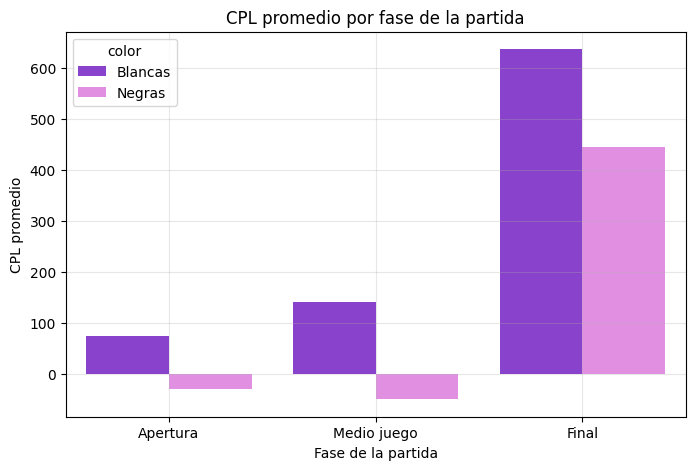

In [57]:
import seaborn as sns

# Definir orden de fases
orden = ["Apertura", "Medio juego", "Final"]

# CPL promedio por fase
estadisticas_cpl_white = df_white_moves.groupby("fase_game")["centipawn_loss"].mean().reset_index()
estadisticas_cpl_white["color"] = "Blancas"

estadisticas_cpl_black = df_black_moves.groupby("fase_game")["centipawn_loss"].mean().reset_index()
estadisticas_cpl_black["color"] = "Negras"

# Unir
estadisticas_cpl = pd.concat([estadisticas_cpl_white, estadisticas_cpl_black])

# Graficar
plt.figure(figsize=(8,5))
sns.barplot(
    data=estadisticas_cpl,
    x="fase_game",
    y="centipawn_loss",
    hue="color",
    order=orden,
    palette={"Blancas":"blueviolet","Negras":"violet"}
)
plt.title("CPL promedio por fase de la partida")
plt.ylabel("CPL promedio")
plt.xlabel("Fase de la partida")
plt.grid(True, alpha=0.3)
plt.show()

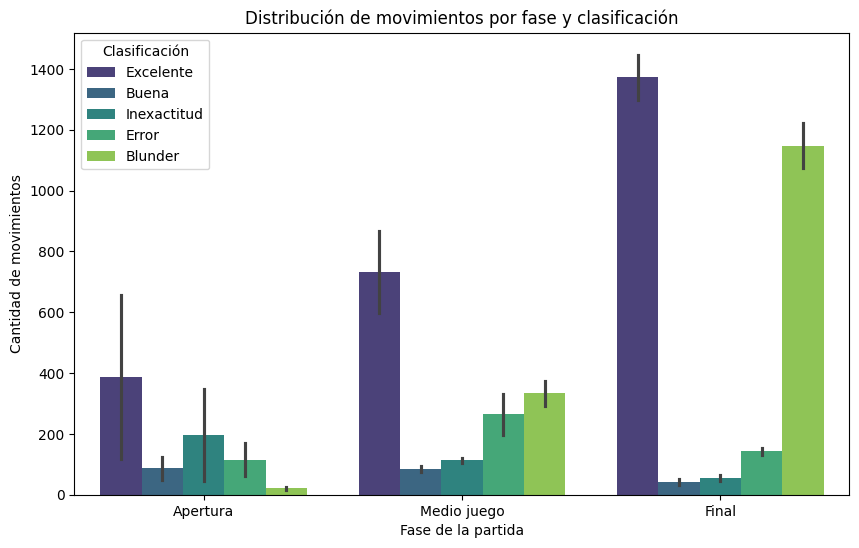

''

In [59]:

# Transformar los df para graficar
estadisticas_fase_white_melted = df_white_moves.groupby("fase_game")["clasificacion"].value_counts().reset_index(name="cantidad")
estadisticas_fase_white_melted["color"] = "Blancas"

estadisticas_fase_black_melted = df_black_moves.groupby("fase_game")["clasificacion"].value_counts().reset_index(name="cantidad")
estadisticas_fase_black_melted["color"] = "Negras"

# Unir ambos
estadisticas_fase_melted = pd.concat([estadisticas_fase_white_melted, estadisticas_fase_black_melted])

# Definir orden de fases y de clasificaciones
orden_fases = ["Apertura", "Medio juego", "Final"]
orden_clasificacion = ["Excelente", "Buena", "Inexactitud", "Error", "Blunder"]

estadisticas_fase_melted["fase_game"] = pd.Categorical(
    estadisticas_fase_melted["fase_game"], categories=orden_fases, ordered=True
)
estadisticas_fase_melted["clasificacion"] = pd.Categorical(
    estadisticas_fase_melted["clasificacion"], categories=orden_clasificacion, ordered=True
)

# Gráfica de barras
plt.figure(figsize=(10,6))
sns.barplot(
    data=estadisticas_fase_melted,
    x="fase_game",
    y="cantidad",
    hue="clasificacion",
    dodge=True,
    palette="viridis"  # o cualquier otra paleta
)
plt.title("Distribución de movimientos por fase y clasificación")
plt.ylabel("Cantidad de movimientos")
plt.xlabel("Fase de la partida")
plt.legend(title="Clasificación")
plt.show()
""